In [2]:
import ipyrad.analysis as ipa
import pandas as pd
import sklearn
import toyplot 
import toyplot.png
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [3]:
imap = {
    "berm" : ["Bermuda_100","Bermuda_103", "Bermuda_15", 
              "Bermuda_19", "Bermuda_28", "Bermuda_30", 
              "Bermuda_54", "Bermuda_55", "Bermuda_63",
              "Bermuda_65", "Bermuda_67", "Bermuda_68",
              "Bermuda_69", "Bermuda_94", "Bermuda_8", 
              "Bermuda_80", "Bermuda_84", "Bermuda_85",
              "Bermuda_94"],
    "guam" : ["Guam_104460", "Guam_104461", "Guam_104464",
              "Guam_104465"],
    "s_afr" : ["South_Africa"],
    "texas" : ["8_TX2017_028", "82_TX2016_049", "6_TX2017_027", 
               "59_TX2016_048", "42_TX2016_046", "13_TX2016_043"]
}
minmap = {i: 0.5 for i in imap}

# Masked Assembly

Text(0, 0.5, 'Count')

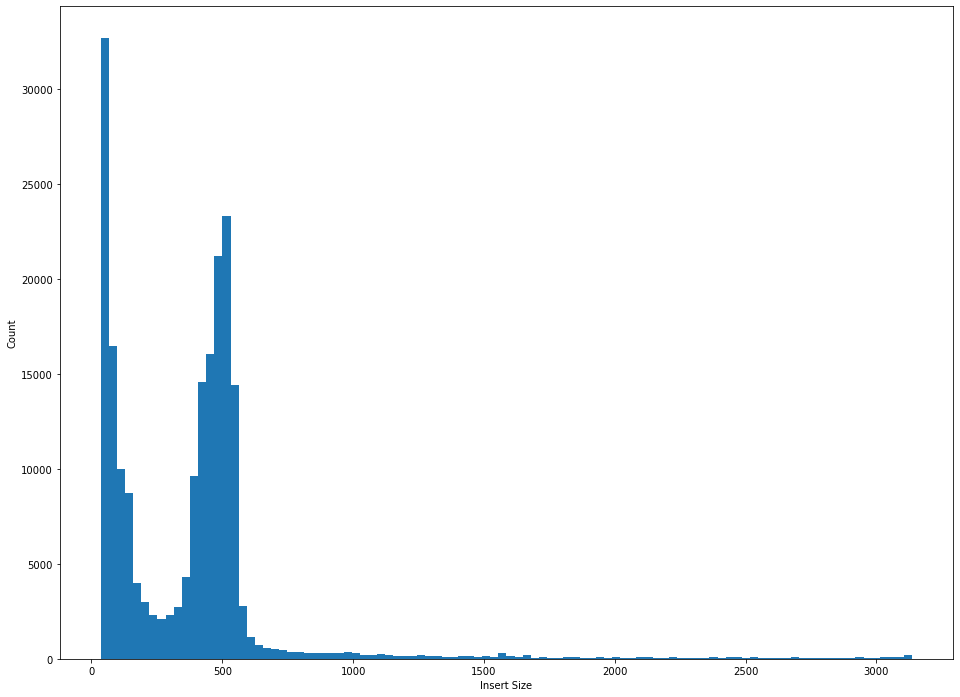

In [4]:
masked_data = "phys_both_outfiles/phys_both.snps.hdf5"
tlens = pd.read_csv("phys_both_consens/TLENs.csv",header=None, names =["Template", "Sample", "Obs_TLEN"])

fig, ax = plt.subplots(figsize = (16,12))

ax.hist(tlens['Obs_TLEN'], bins = 100)
ax.set_xlabel("Insert Size")
ax.set_ylabel("Count")

## PCA analysis

In [5]:
masked_pca = ipa.pca(
    data = masked_data,
    imap = imap,
    minmap = minmap,
    mincov = 1,)
masked_pca.run(nreplicates=100, seed=123)
results = pd.DataFrame(masked_pca.pcaxes[0], index=masked_pca.names)

Samples: 29
Sites before filtering: 101658
Filtered (indels): 0
Filtered (bi-allel): 3584
Filtered (mincov): 154
Filtered (minmap): 95712
Filtered (subsample invariant): 8687
Filtered (minor allele frequency): 0
Filtered (combined): 96924
Sites after filtering: 5440
Sites containing missing values: 5372 (98.75%)
Missing values in SNP matrix: 30572 (19.38%)
SNPs (total): 5440
SNPs (unlinked): 404
Imputation (null; sets to 0): 100.0%, 0.0%, 0.0%
Subsampling SNPs: 404/5440


Text(0, 0.5, 'PCA1')

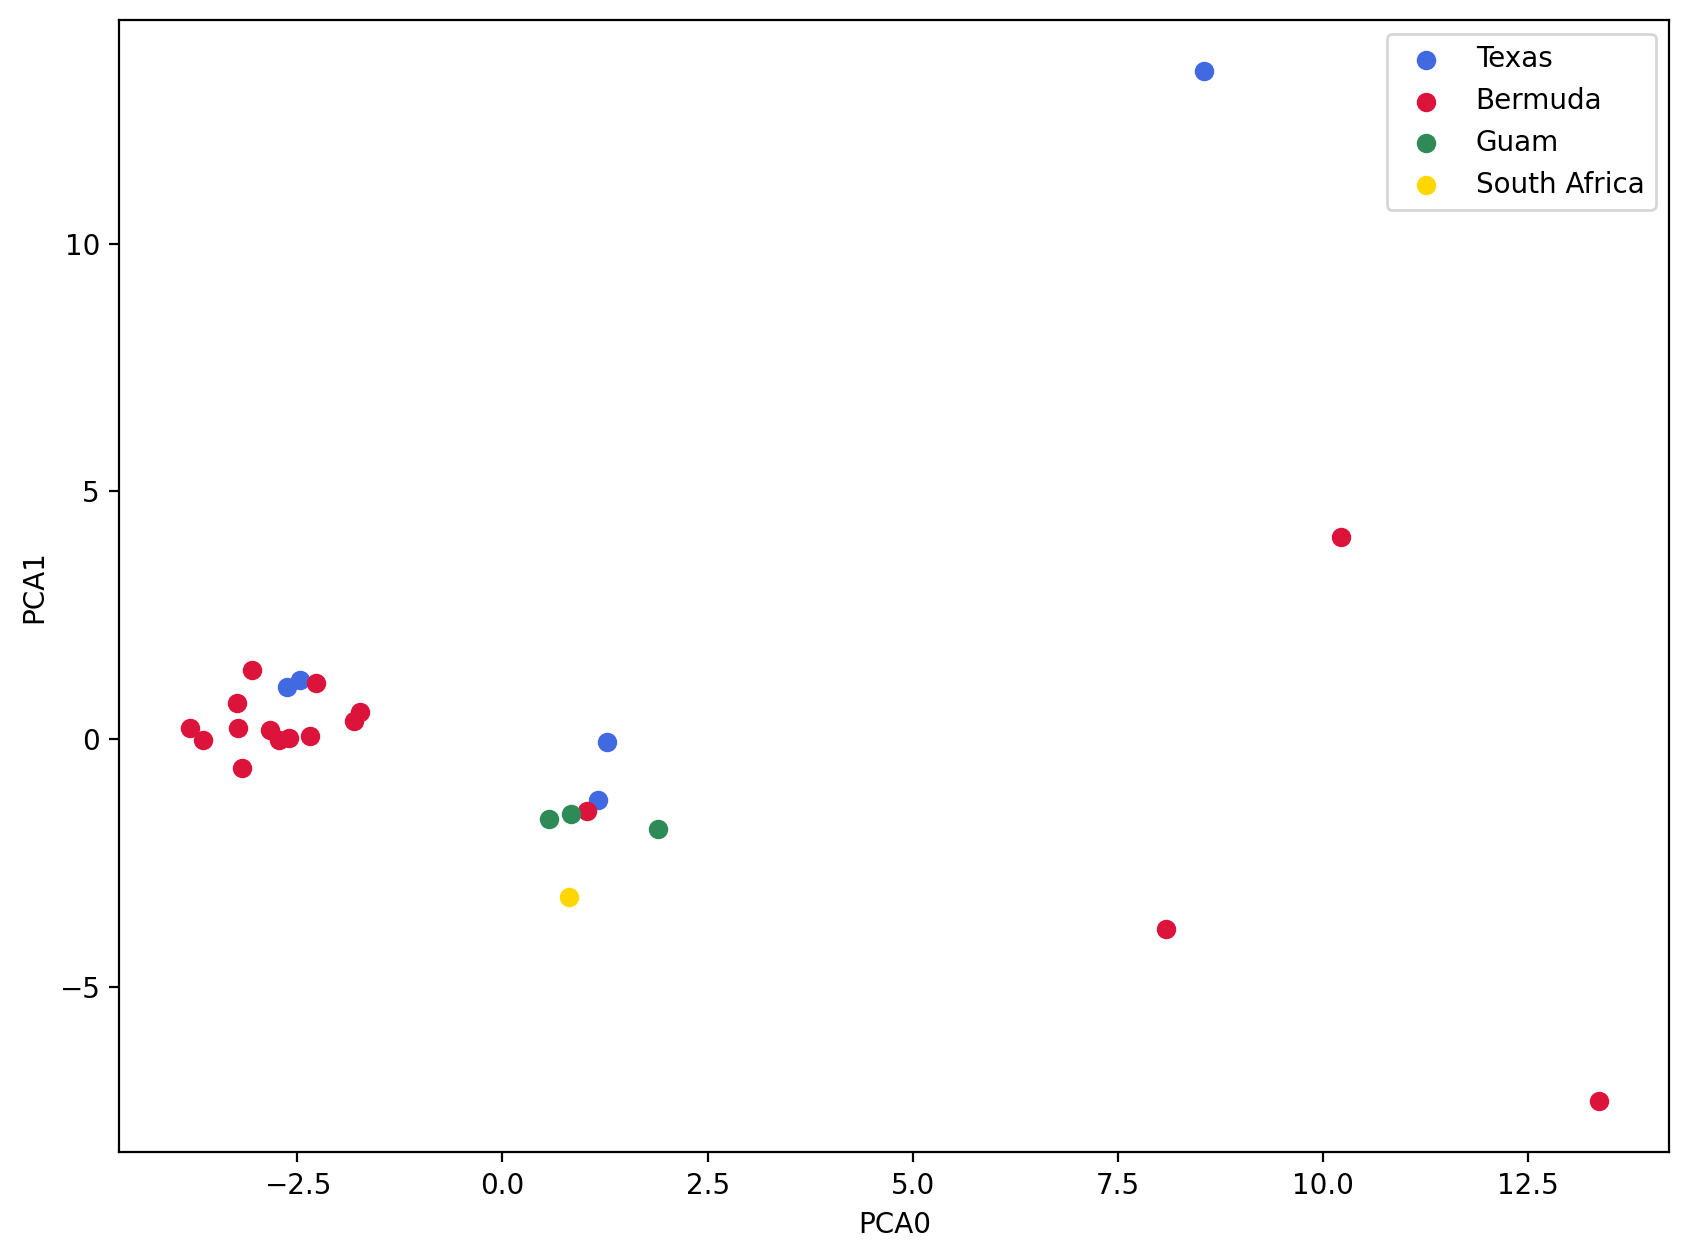

In [6]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[0].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[0].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[0].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[0].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")



Text(0, 0.5, 'PCA1')

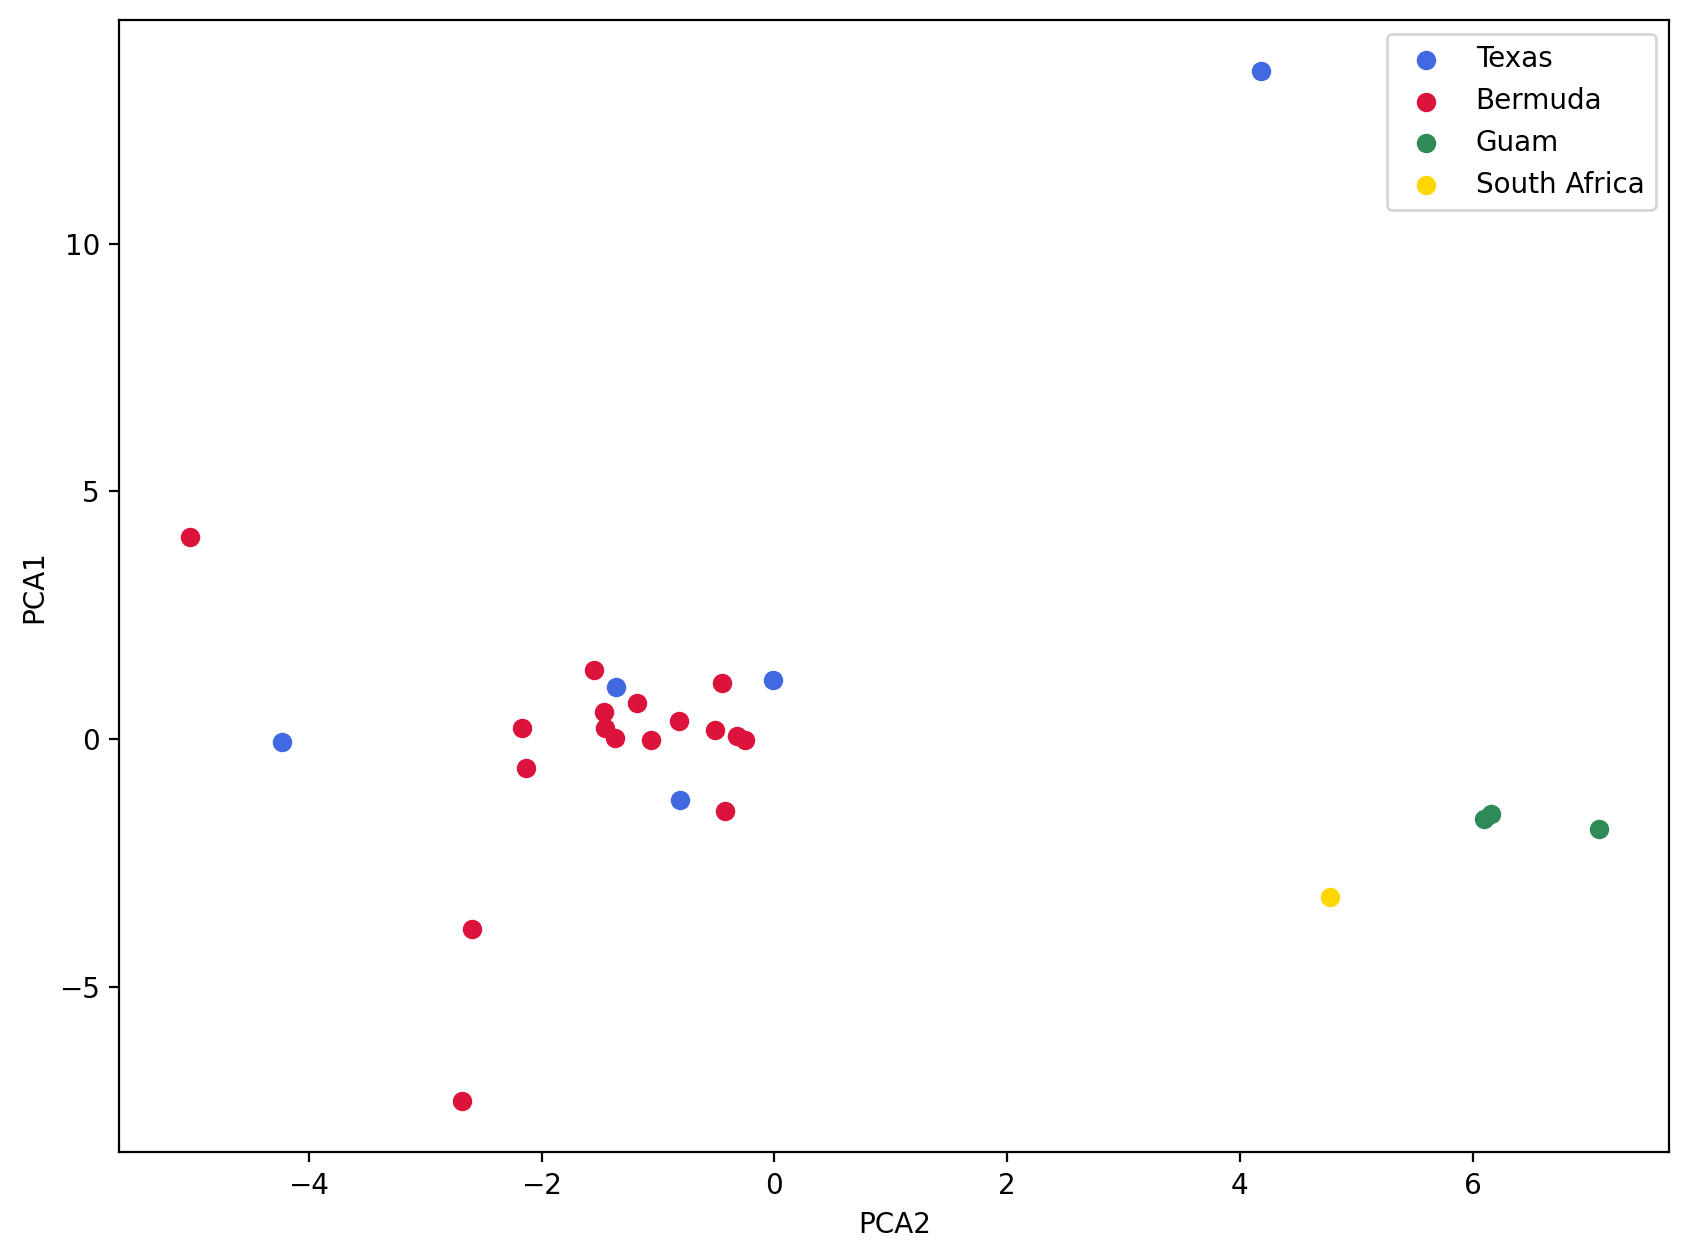

In [7]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[2].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[2].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[2].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[2].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA2")
ax.set_ylabel("PCA1")

## Structure Analysis

In [8]:
masked_struct = ipa.structure(
    name="masked",
    data = masked_data,
    imap = imap,
    minmap = minmap,
    mincov = 0.9)

masked_struct.mainparams.burnin = 5000
masked_struct.mainparams.numreps = 10000
masked_struct.run(nreps=20, kpop=[2, 3, 4, 5], auto=True)

80 previous results loaded for run [masked]
Samples: 29
Sites before filtering: 101658
Filtered (indels): 0
Filtered (bi-allel): 3584
Filtered (mincov): 100625
Filtered (minmap): 95712
Filtered (subsample invariant): 8687
Filtered (minor allele frequency): 0
Filtered (combined): 101651
Sites after filtering: 713
Sites containing missing values: 645 (90.46%)
Missing values in SNP matrix: 1024 (4.95%)
SNPs (total): 713
SNPs (unlinked): 89
[####################] 100% 0:03:28 | running 40 structure jobs 


In [9]:
masked_etable = masked_struct.get_evanno_table([2, 3, 4, 5])
display(Markdown(masked_etable.to_markdown()))

|    |   Nreps |    lnPK |   lnPPK |   deltaK |   estLnProbMean |   estLnProbStdev |
|---:|--------:|--------:|--------:|---------:|----------------:|-----------------:|
|  2 |      20 |   0     |   0     | 0        |        -660.69  |          24.3538 |
|  3 |      20 |   8.625 |  39.595 | 0.525706 |        -652.065 |          75.3178 |
|  4 |      20 | -30.97  |  51.95  | 0.271659 |        -683.035 |         191.233  |
|  5 |      20 |  20.98  |   0     | 0        |        -662.055 |          50.7713 |

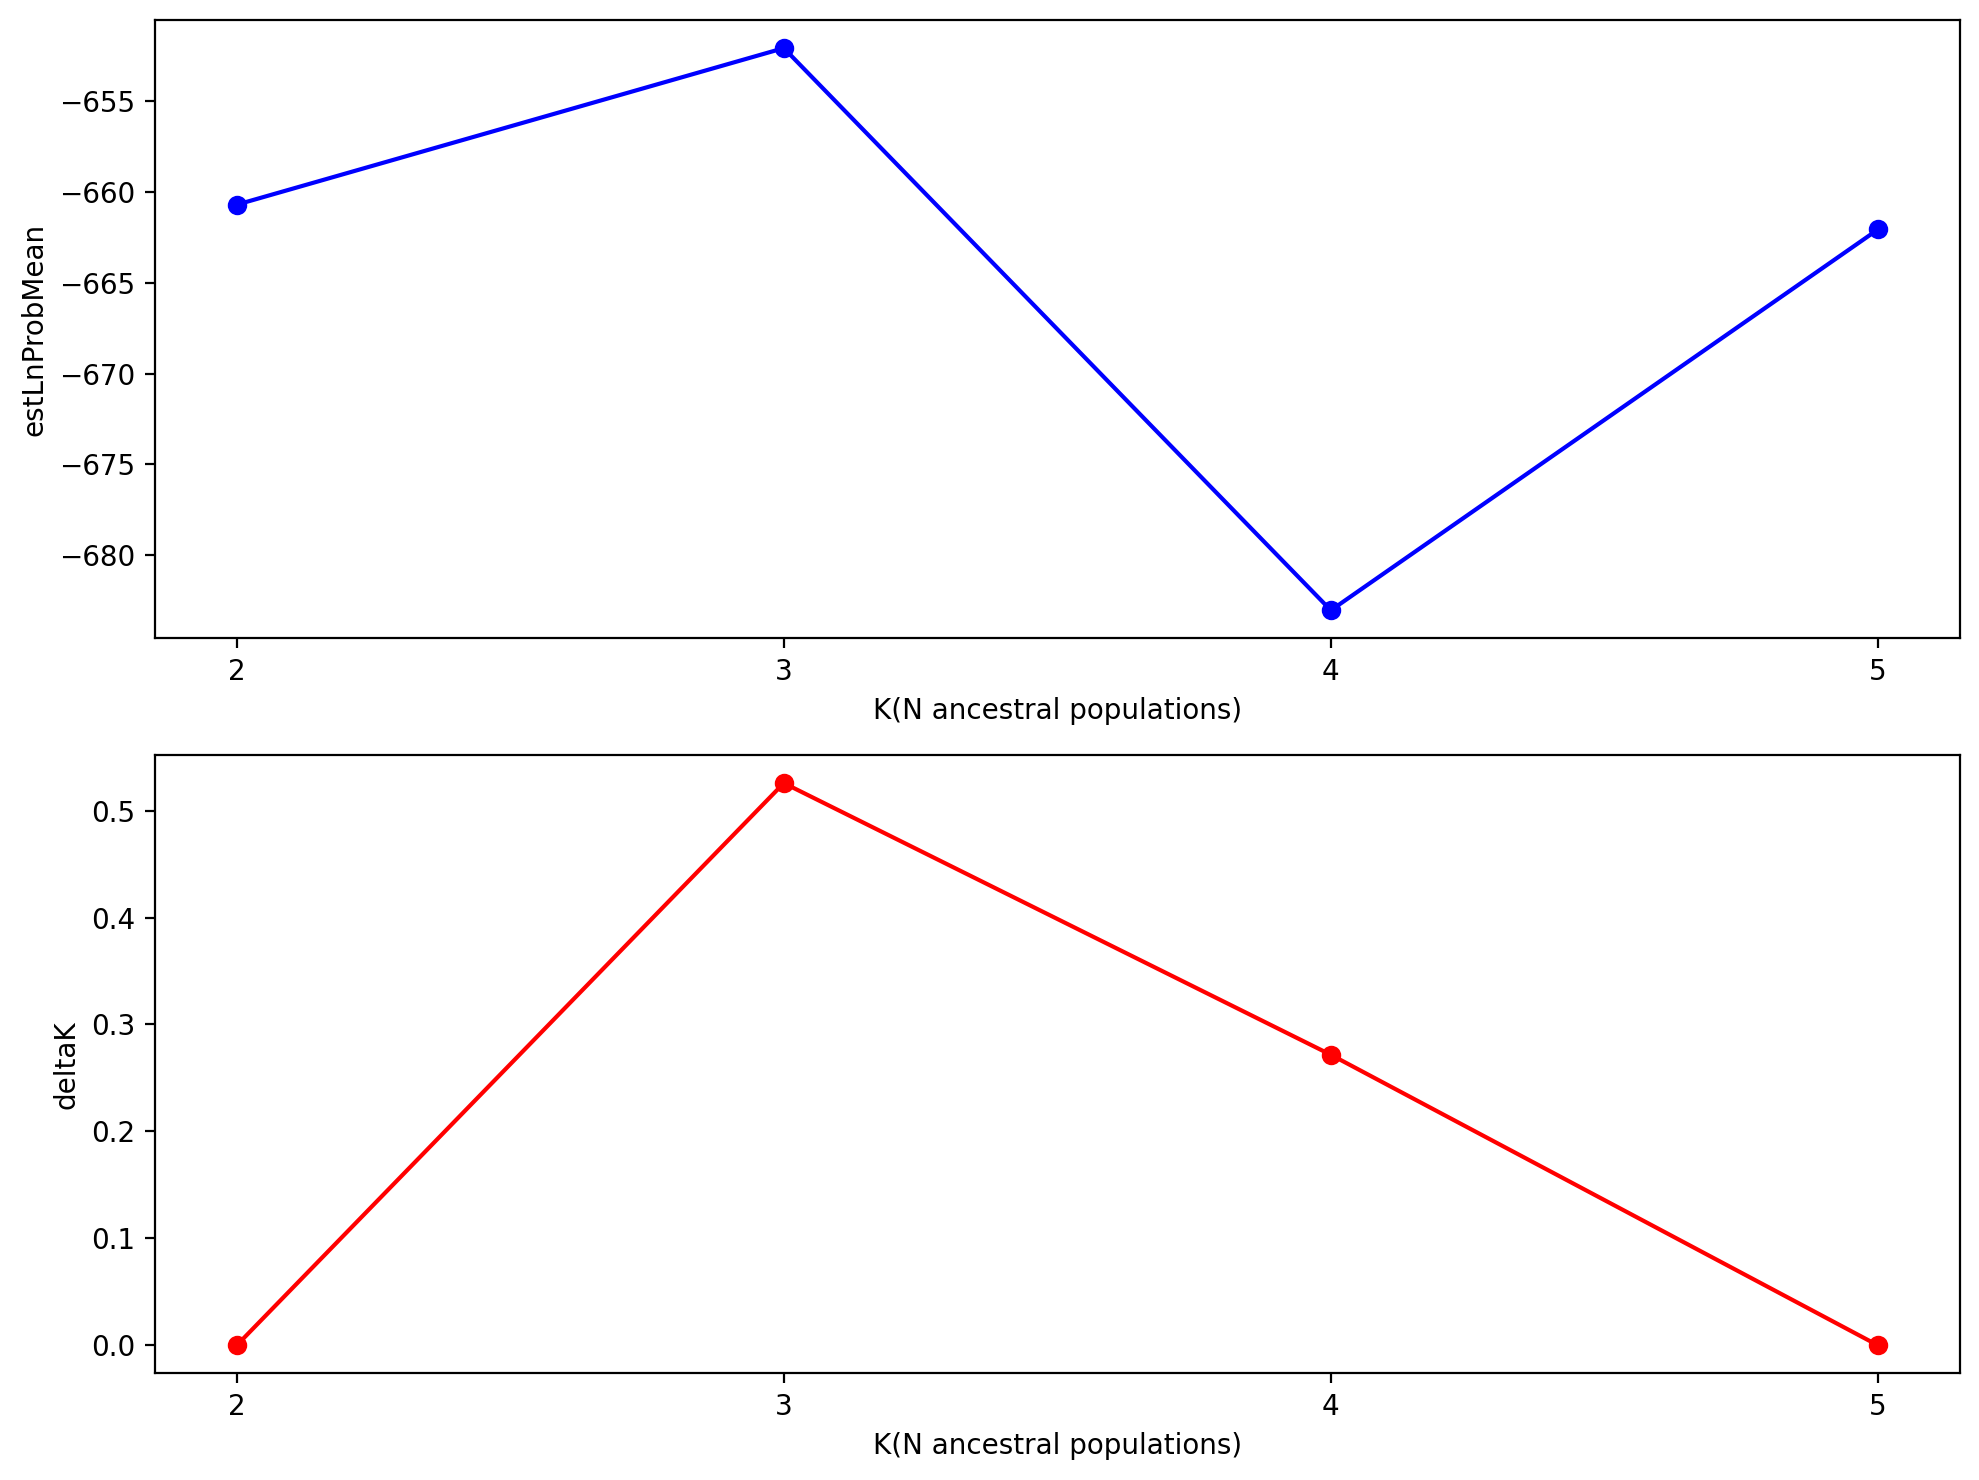

In [10]:
fig, [ax, ax2] = plt.subplots(2,figsize = (10,7.5), dpi=200,)
ax.plot(masked_etable.index, masked_etable.estLnProbMean, "-bo",)

ax.set_xticks([2,3,4,5])
ax.set_ylabel("estLnProbMean")
ax.set_xlabel("K(N ancestral populations)")


ax2.plot(masked_etable.index, masked_etable.deltaK, "-ro", zorder=2)

ax2.set_xticks([2,3,4,5])
ax2.set_ylabel("deltaK")
ax2.set_xlabel("K(N ancestral populations)")

fig.tight_layout() 

In [36]:
k = 3
table = masked_struct.get_clumpp_table(k)

[K3] 20/20 results permuted across replicates (max_var=0).


In [37]:
# sort list by columns
table.sort_values(by=list(range(k)), inplace=True)

# or, sort by a list of names (here taken from imap)
import itertools
onames = list(itertools.chain(*imap.values()))
table = table.loc[onames]


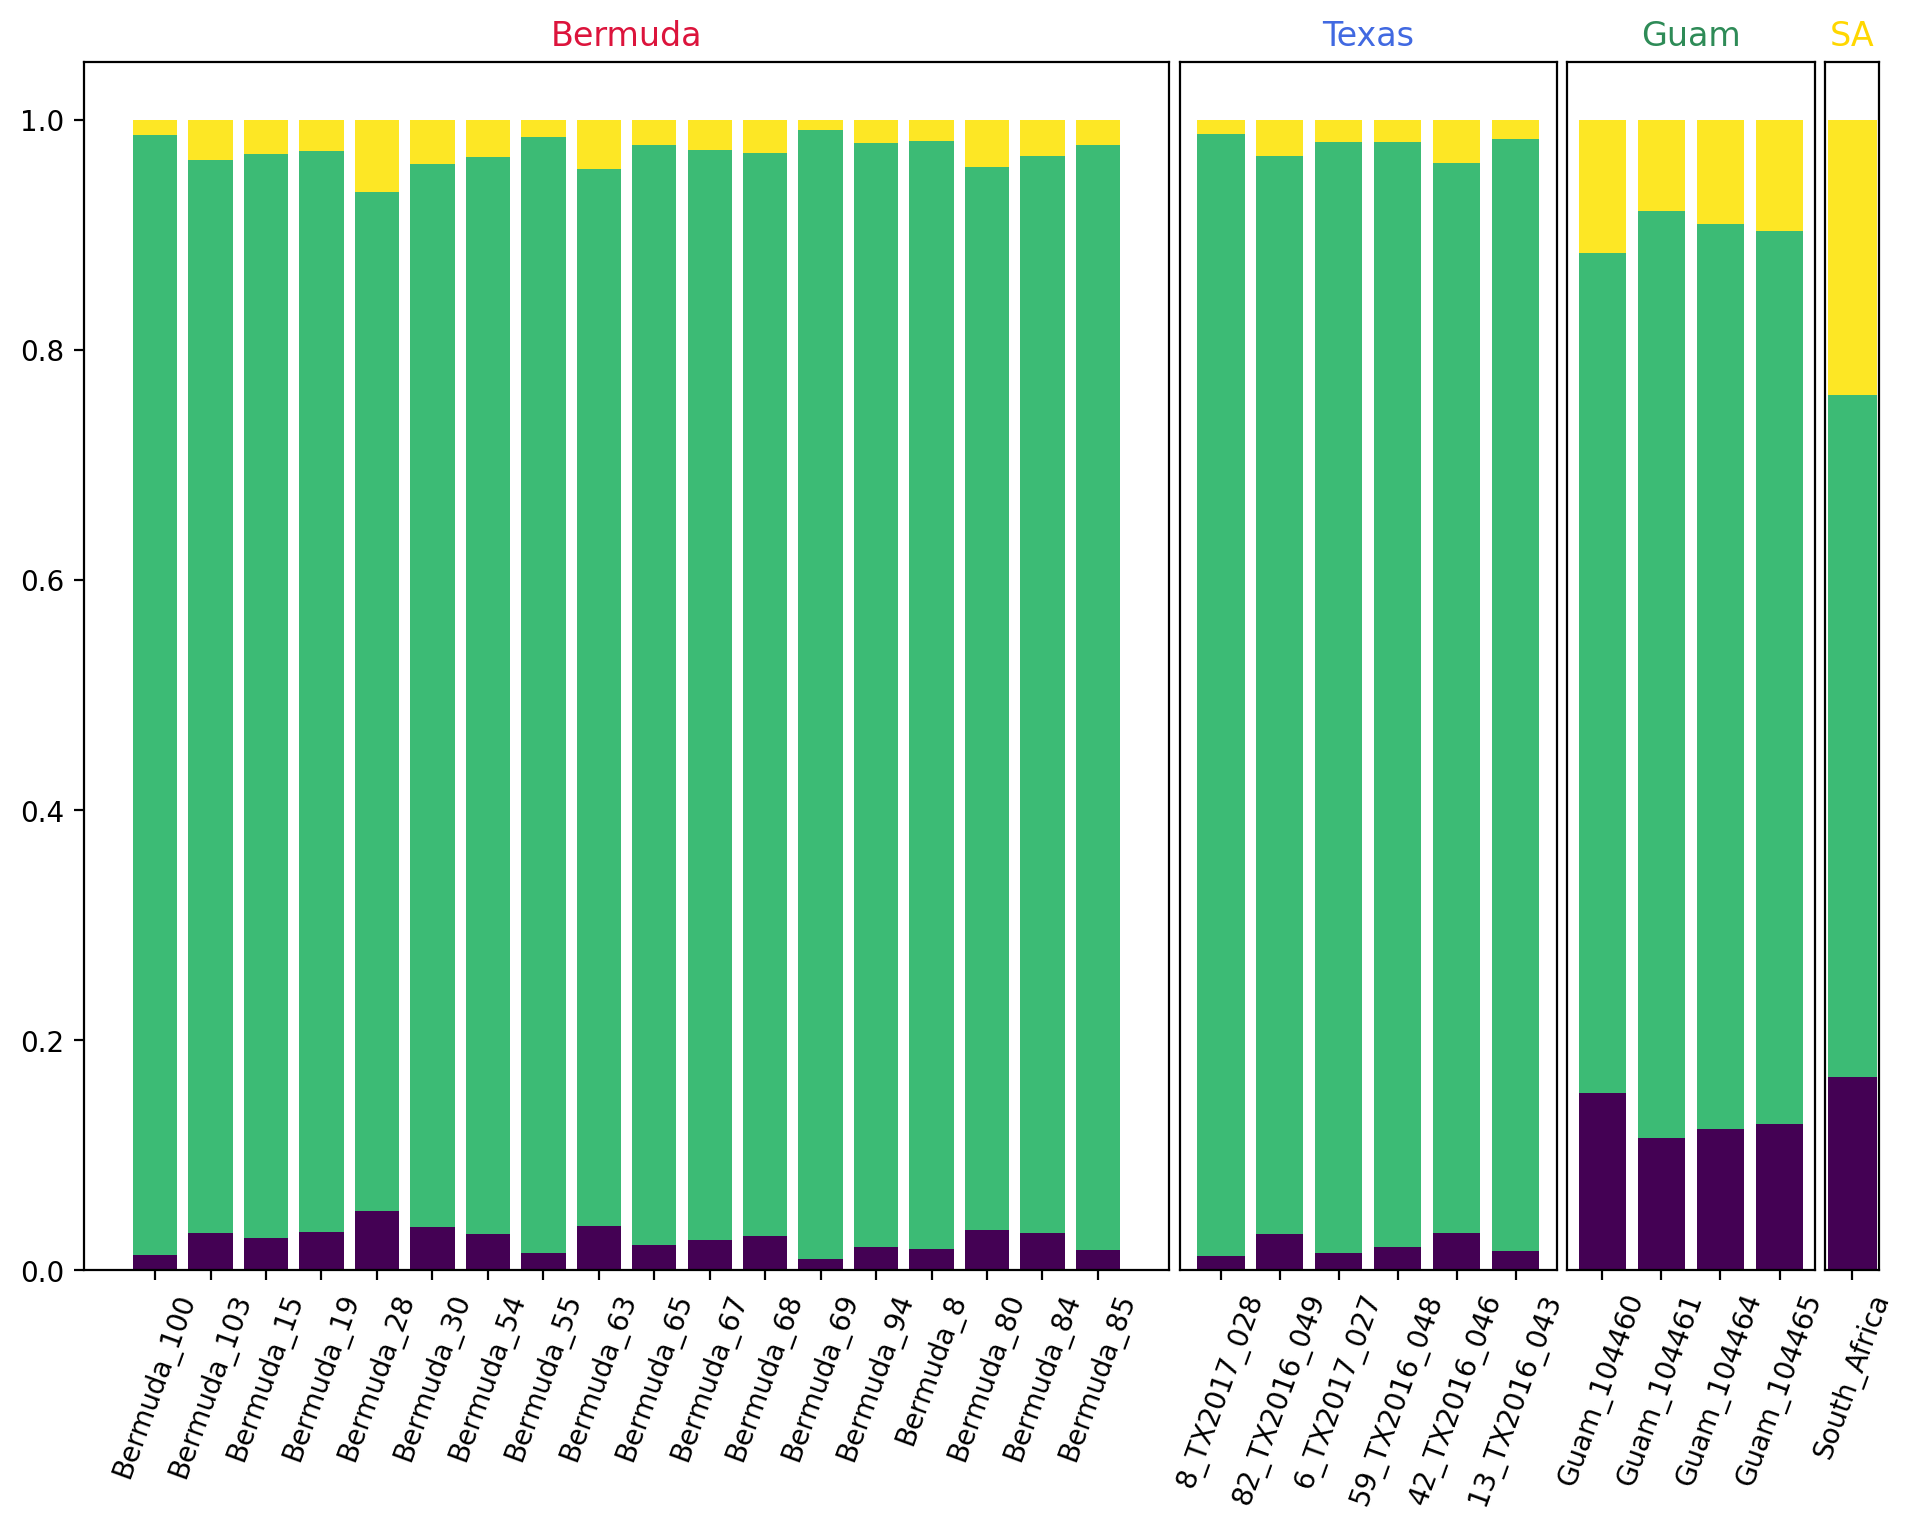

In [38]:
fig = plt.figure( figsize = (12,8), dpi=200)
gs = fig.add_gridspec(1, 29)


ax1 = fig.add_subplot(gs[0:17])
plt.xticks(rotation=45) 
ax1.bar(table.index[0:19], table[0].iloc[0:19], color = "#440154FF")
ax1.bar(table.index[0:19], table[1].iloc[0:19], bottom = +table[0].iloc[0:19], color = "#3CBB75FF")
ax1.bar(table.index[0:19], table[2].iloc[0:19], bottom = table[0].iloc[0:19]++table[1].iloc[0:19], color = "#FDE725FF")
ax1.tick_params(axis='x', rotation=70)
ax1.set_title("Bermuda", c = "crimson")

ax2 = fig.add_subplot(gs[17:23], sharey = ax1 )
ax2.bar(table.index[24:], table[0].iloc[24:], color = "#440154FF")
ax2.bar(table.index[24:], table[1].iloc[24:], bottom = table[0].iloc[24:], color = "#3CBB75FF")
ax2.bar(table.index[24:], table[2].iloc[24:], bottom = table[0].iloc[24:]+table[1].iloc[24:], color = "#FDE725FF")
ax2.tick_params(axis='x', rotation=70)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title("Texas", c = "royalblue")

ax3 = fig.add_subplot(gs[23:27], sharey = ax1 )
ax3.bar(table.index[19:23], table[0].iloc[19:23], color = "#440154FF")

ax3.bar(table.index[19:23], table[1].iloc[19:23], bottom = table[0].iloc[19:23], color = "#3CBB75FF")
ax3.bar(table.index[19:23], table[2].iloc[19:23], bottom = table[0].iloc[19:23]+table[1].iloc[19:23], color = "#FDE725FF")
ax3.tick_params(axis='x', rotation=70)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_title("Guam", c = "seagreen")

ax4 = fig.add_subplot(gs[27], sharey = ax1)
ax4.bar(table.index[23], table[0].iloc[23], color = "#440154FF")

ax4.bar(table.index[23], table[1].iloc[23], bottom = table[0].iloc[23], color = "#3CBB75FF")
ax4.bar(table.index[23], table[2].iloc[23], bottom = table[0].iloc[23]+table[1].iloc[23], color = "#FDE725FF")
ax4.tick_params(axis='x', rotation=70)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_title("SA", c = "gold")

fig.show()




# Unmasked Assembly

Text(0, 0.5, 'Count')

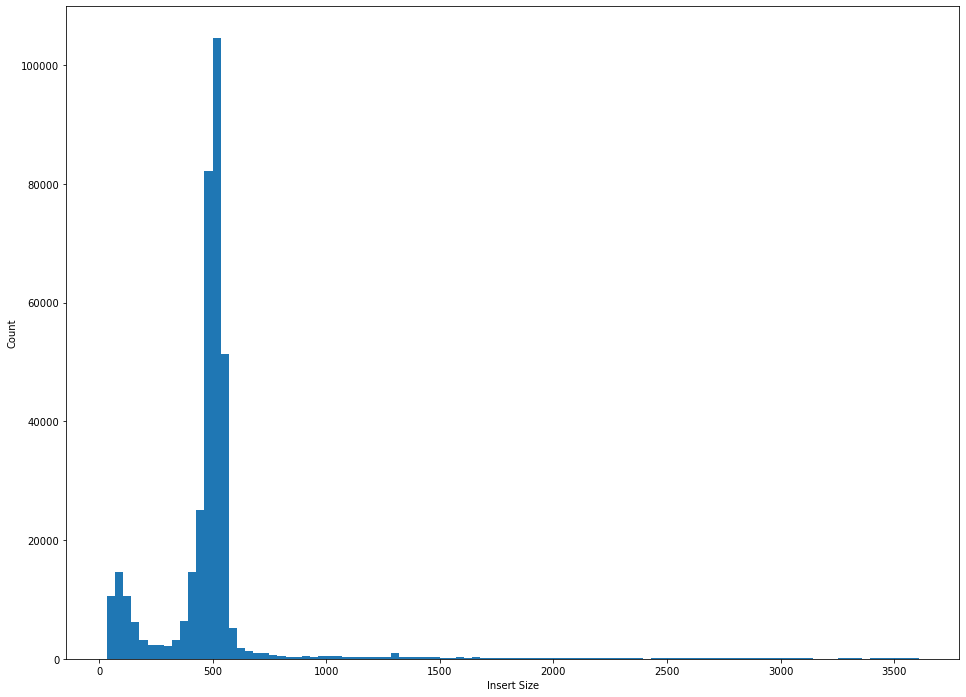

In [14]:
unmasked_data = "phys_unmasked_outfiles/phys_unmasked.snps.hdf5"

tlens = pd.read_csv("phys_unmasked_consens/TLENs.csv",header=None, names =["Template", "Sample", "Obs_TLEN"])

fig, ax = plt.subplots(figsize = (16,12))

ax.hist(tlens['Obs_TLEN'], bins = 100)
ax.set_xlabel("Insert Size")
ax.set_ylabel("Count")

## PCA analysis

In [15]:
unmasked_pca = ipa.pca(
    data = unmasked_data,
    imap = imap,
    minmap = minmap,
    mincov = 1,)
unmasked_pca.run(nreplicates=100, seed=123)
results = pd.DataFrame(unmasked_pca.pcaxes[0], index=unmasked_pca.names)

Samples: 29
Sites before filtering: 205250
Filtered (indels): 0
Filtered (bi-allel): 5653
Filtered (mincov): 154
Filtered (minmap): 191734
Filtered (subsample invariant): 12116
Filtered (minor allele frequency): 0
Filtered (combined): 193483
Sites after filtering: 12518
Sites containing missing values: 11700 (93.47%)
Missing values in SNP matrix: 73046 (20.12%)
SNPs (total): 12518
SNPs (unlinked): 524
Imputation (null; sets to 0): 100.0%, 0.0%, 0.0%
Subsampling SNPs: 524/12518


Text(0, 0.5, 'PCA1')

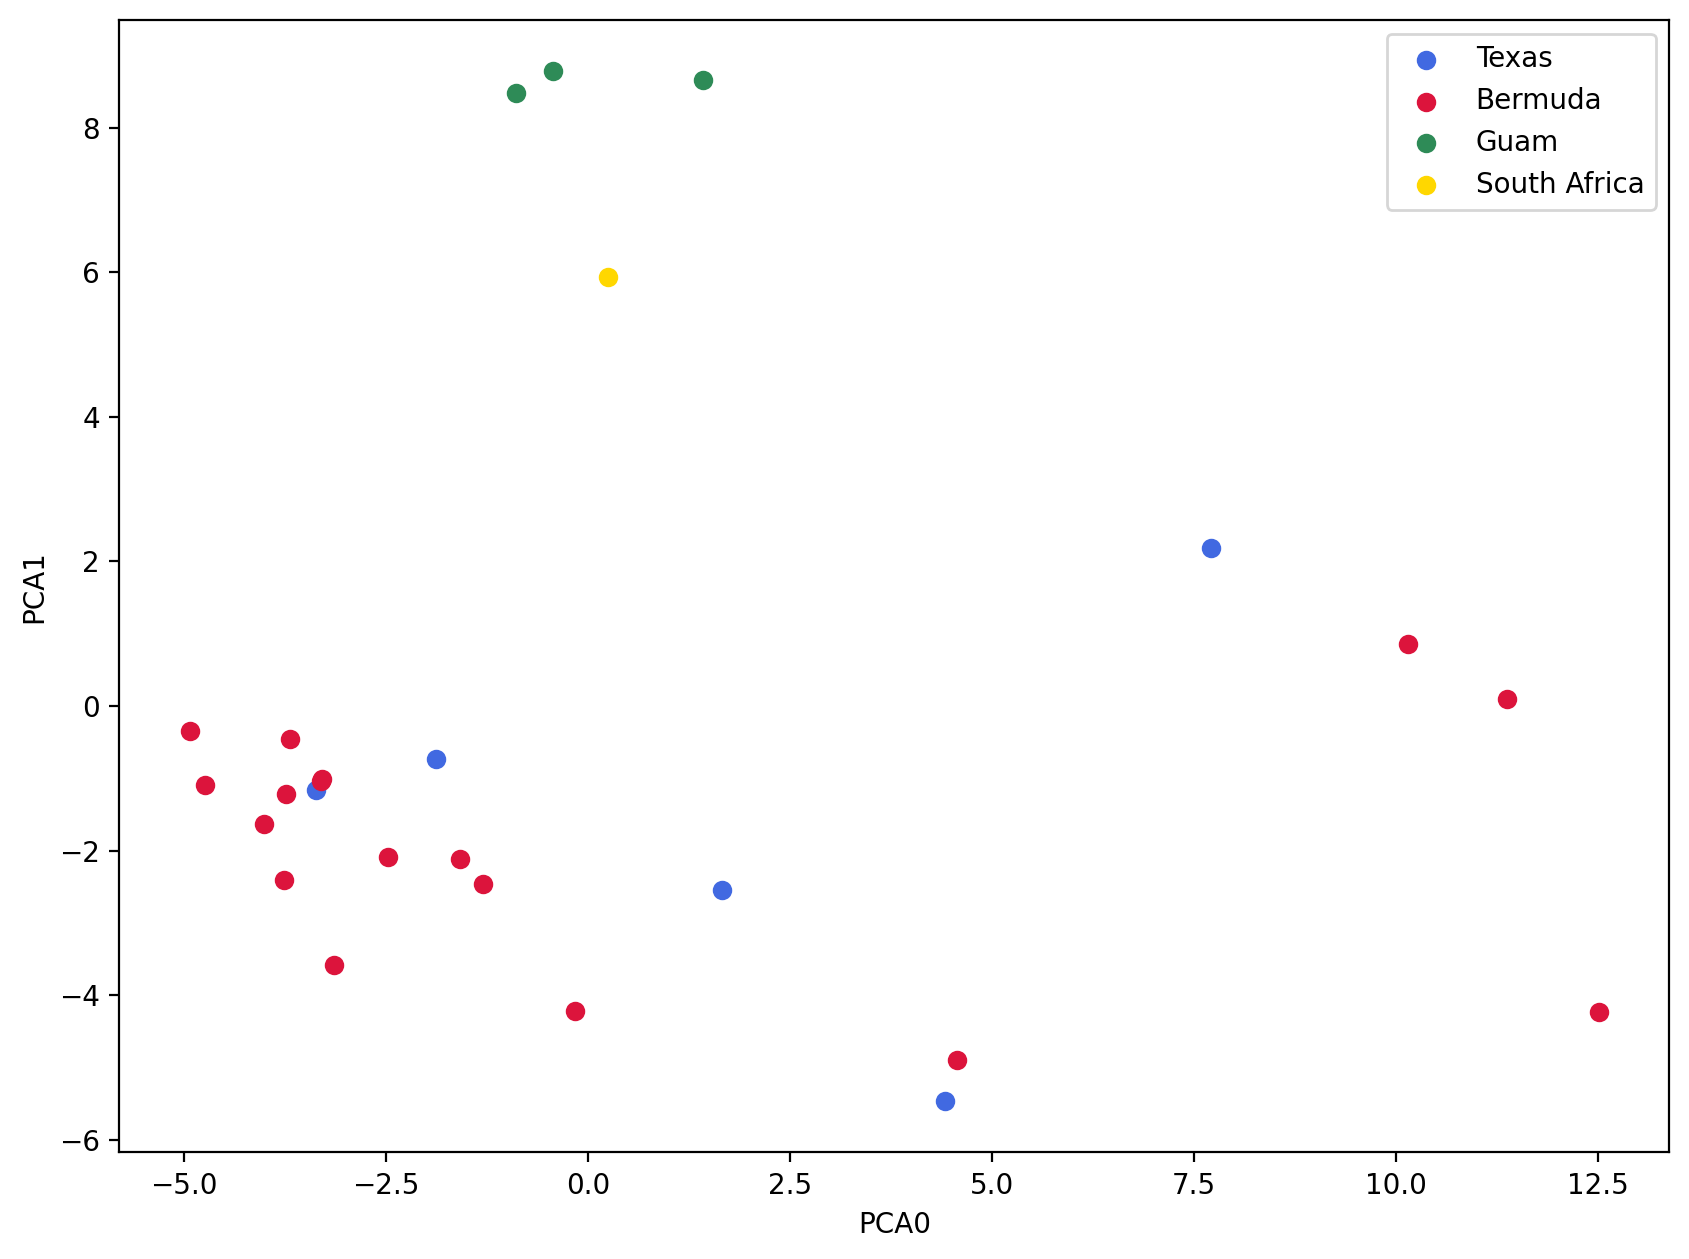

In [16]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[0].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[0].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[0].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[0].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")

Text(0, 0.5, 'PCA1')

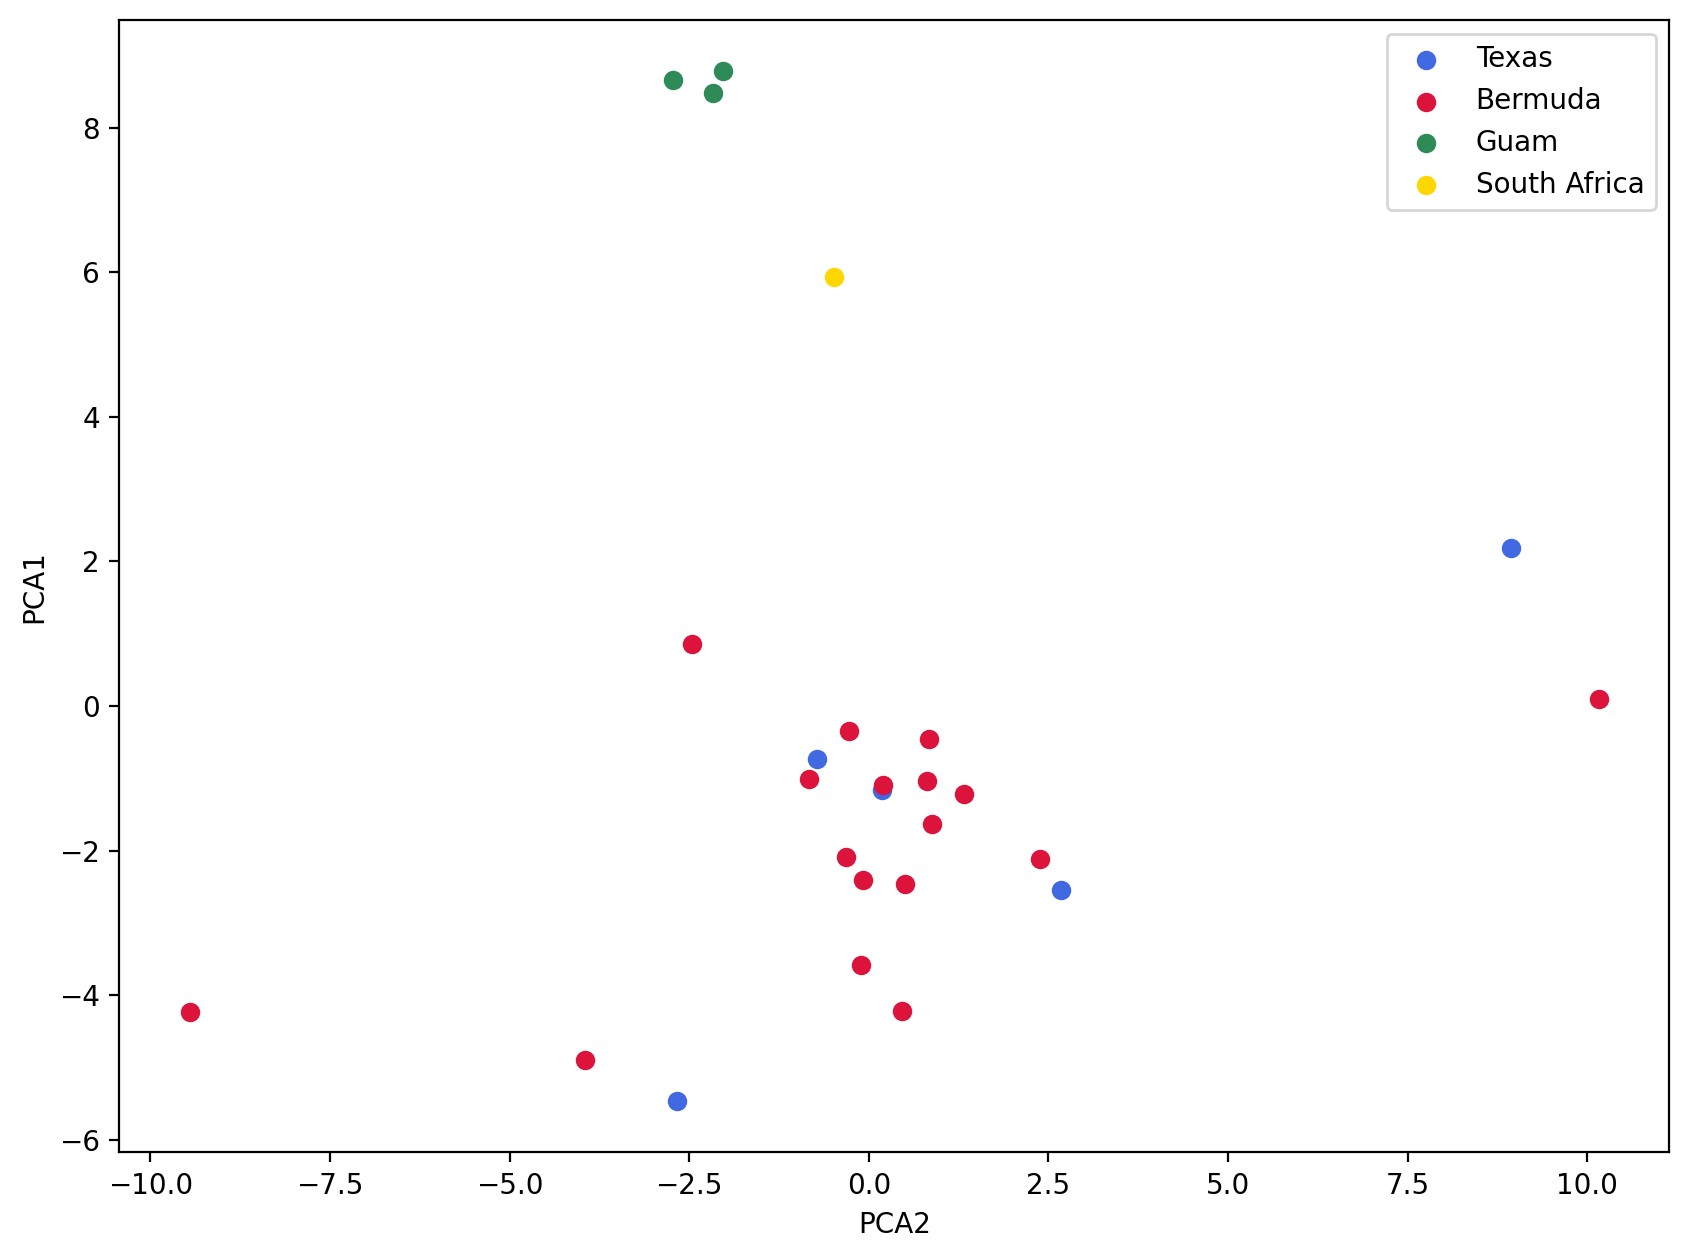

In [17]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[2].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[2].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[2].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[2].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA2")
ax.set_ylabel("PCA1")

## Structure analysis

In [24]:
unmasked_struct = ipa.structure(
    name="unmasked",
    data = unmasked_data,
    imap = imap,
    minmap = minmap,
    mincov = 0.9)

unmasked_struct.mainparams.burnin = 5000
unmasked_struct.mainparams.numreps = 10000
unmasked_struct.run(nreps=20, kpop=[2, 3, 4, 5], auto=True)

80 previous results loaded for run [unmasked]
Samples: 29
Sites before filtering: 205250
Filtered (indels): 0
Filtered (bi-allel): 5653
Filtered (mincov): 201692
Filtered (minmap): 191734
Filtered (subsample invariant): 12116
Filtered (minor allele frequency): 0
Filtered (combined): 203521
Sites after filtering: 2480
Sites containing missing values: 1662 (67.02%)
Missing values in SNP matrix: 2472 (3.44%)
SNPs (total): 2480
SNPs (unlinked): 97
[####################] 100% 0:03:49 | running 40 structure jobs 


In [25]:
unmasked_etable = unmasked_struct.get_evanno_table([2, 3, 4, 5])
display(Markdown(unmasked_etable.to_markdown()))

|    |   Nreps |    lnPK |   lnPPK |   deltaK |   estLnProbMean |   estLnProbStdev |
|---:|--------:|--------:|--------:|---------:|----------------:|-----------------:|
|  2 |      20 |   0     |   0     | 0        |        -782.82  |          32.9044 |
|  3 |      20 |  45.965 | 118.905 | 1.89939  |        -736.855 |          62.6015 |
|  4 |      20 | -72.94  | 122.72  | 0.854963 |        -809.795 |         143.538  |
|  5 |      20 |  49.78  |   0     | 0        |        -760.015 |          86.2802 |

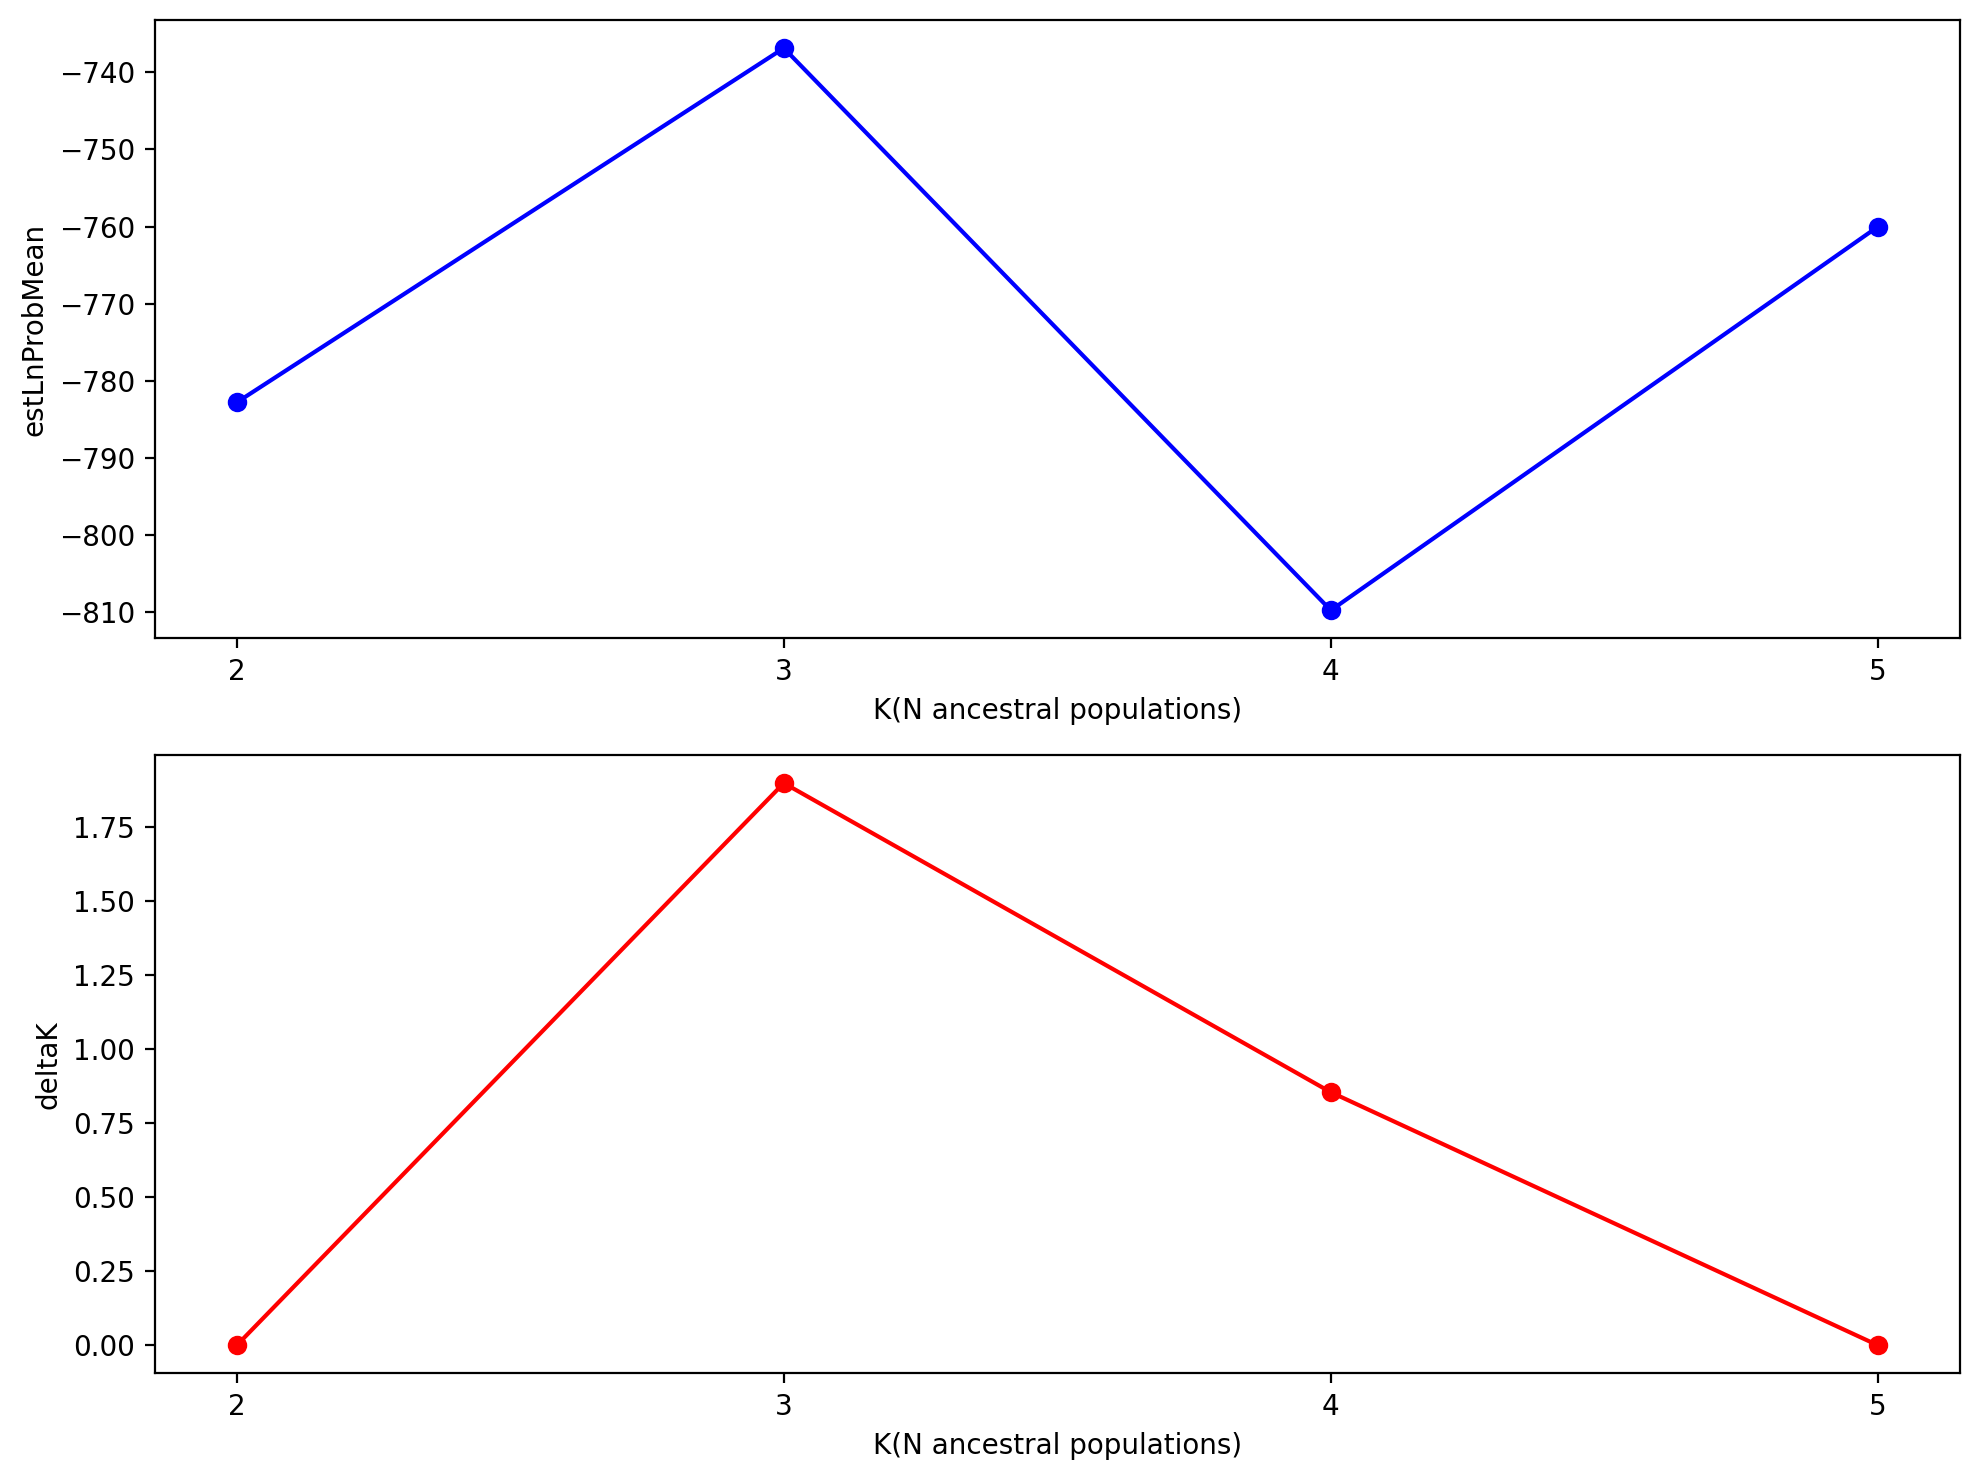

In [26]:
fig, [ax, ax2] = plt.subplots(2,figsize = (10,7.5), dpi=200,)
ax.plot(unmasked_etable.index, unmasked_etable.estLnProbMean, "-bo",)

ax.set_xticks([2,3,4,5])
ax.set_ylabel("estLnProbMean")
ax.set_xlabel("K(N ancestral populations)")


ax2.plot(unmasked_etable.index, unmasked_etable.deltaK, "-ro", zorder=2)

ax2.set_xticks([2,3,4,5])
ax2.set_ylabel("deltaK")
ax2.set_xlabel("K(N ancestral populations)")

fig.tight_layout() 

In [39]:
k = 3
table = unmasked_struct.get_clumpp_table(k)

[K3] 20/20 results permuted across replicates (max_var=0).


In [40]:
# sort list by columns
table.sort_values(by=list(range(k)), inplace=True)

# or, sort by a list of names (here taken from imap)
import itertools
onames = list(itertools.chain(*imap.values()))
table = table.loc[onames]

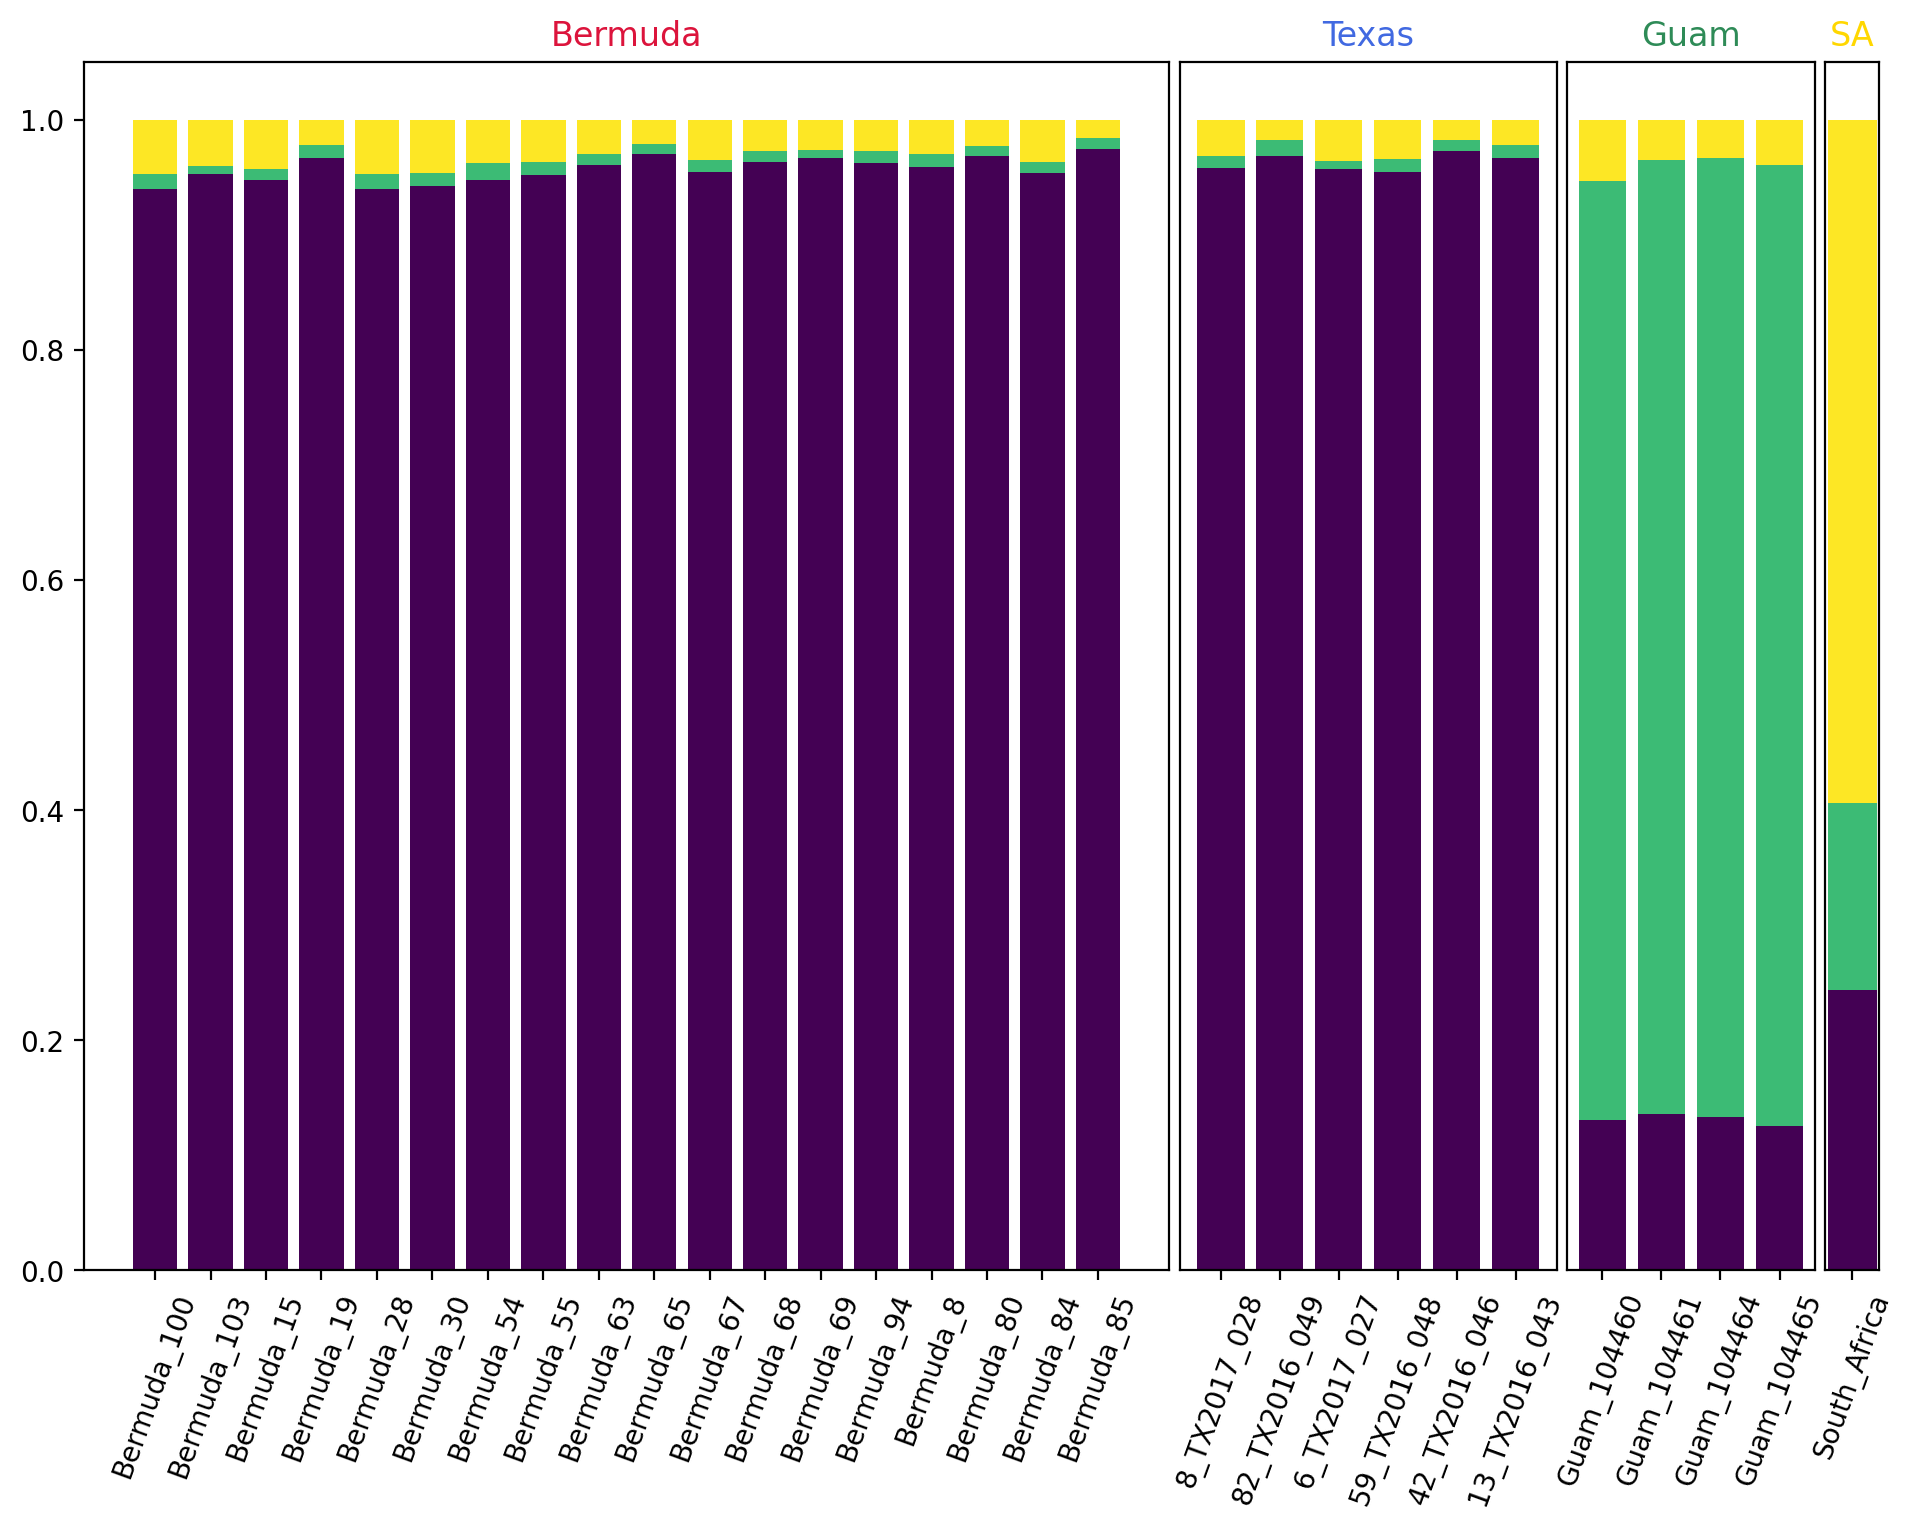

In [41]:
fig = plt.figure( figsize = (12,8), dpi=200)
gs = fig.add_gridspec(1, 29)


ax1 = fig.add_subplot(gs[0:17])
plt.xticks(rotation=45) 
ax1.bar(table.index[0:19], table[0].iloc[0:19], color = "#440154FF")
ax1.bar(table.index[0:19], table[1].iloc[0:19], bottom = +table[0].iloc[0:19], color = "#3CBB75FF")
ax1.bar(table.index[0:19], table[2].iloc[0:19], bottom = table[0].iloc[0:19]++table[1].iloc[0:19], color = "#FDE725FF")
ax1.tick_params(axis='x', rotation=70)
ax1.set_title("Bermuda", c = "crimson")

ax2 = fig.add_subplot(gs[17:23], sharey = ax1 )
ax2.bar(table.index[24:], table[0].iloc[24:], color = "#440154FF")
ax2.bar(table.index[24:], table[1].iloc[24:], bottom = table[0].iloc[24:], color = "#3CBB75FF")
ax2.bar(table.index[24:], table[2].iloc[24:], bottom = table[0].iloc[24:]+table[1].iloc[24:], color = "#FDE725FF")
ax2.tick_params(axis='x', rotation=70)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title("Texas", c = "royalblue")

ax3 = fig.add_subplot(gs[23:27], sharey = ax1 )
ax3.bar(table.index[19:23], table[0].iloc[19:23], color = "#440154FF")

ax3.bar(table.index[19:23], table[1].iloc[19:23], bottom = table[0].iloc[19:23], color = "#3CBB75FF")
ax3.bar(table.index[19:23], table[2].iloc[19:23], bottom = table[0].iloc[19:23]+table[1].iloc[19:23], color = "#FDE725FF")
ax3.tick_params(axis='x', rotation=70)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_title("Guam", c = "seagreen")

ax4 = fig.add_subplot(gs[27], sharey = ax1)
ax4.bar(table.index[23], table[0].iloc[23], color = "#440154FF")

ax4.bar(table.index[23], table[1].iloc[23], bottom = table[0].iloc[23], color = "#3CBB75FF")
ax4.bar(table.index[23], table[2].iloc[23], bottom = table[0].iloc[23]+table[1].iloc[23], color = "#FDE725FF")
ax4.tick_params(axis='x', rotation=70)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_title("SA", c = "gold")


fig.show()